In [11]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Download tensorflow eurosat dataset
(train, test), info = tfds.load('eurosat/all', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)
assert isinstance(train, tf.data.Dataset)
print(train)

sample = train.take(1)


for image, label in tfds.as_numpy(sample):
    print(type(image), type(label), label)

print(info.features)

print('Train test split sizes: ')
print('Train: ', len(train))
print('Test: ', len(test))


<PrefetchDataset shapes: ((64, 64, 13), ()), types: (tf.float32, tf.int64)>
<class 'numpy.ndarray'> <class 'numpy.int64'> 8
FeaturesDict({
    'filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    'sentinel2': Tensor(shape=(64, 64, 13), dtype=tf.float32),
})
Train test split sizes: 
Train:  21600
Test:  5400


In [3]:
input_dim = (64, 64, 13)

train.element_spec

(TensorSpec(shape=(64, 64, 13), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [4]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=True, classes=10, weights=None, input_shape=input_dim, pooling='avg'
)

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\Niels\.virtualenvs\uc-landcover-types--9lkH9oZ\lib\site-packages\keras\applications\resnet.py:135: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 13 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 13)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 13)   0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   40832       ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']      

In [6]:
hist = model.fit(train.batch(32),  epochs=50, validation_data=test.batch(32))

Epoch 1/50
675/675 [==============================] - 37s 54ms/step - loss: 0.2059 - accuracy: 0.9337 - val_loss: 0.6657 - val_accuracy: 0.8063
Epoch 2/50
675/675 [==============================] - 37s 55ms/step - loss: 0.2014 - accuracy: 0.9378 - val_loss: 1.5529 - val_accuracy: 0.8737
Epoch 3/50
675/675 [==============================] - 37s 54ms/step - loss: 0.1443 - accuracy: 0.9519 - val_loss: 0.7542 - val_accuracy: 0.8072
Epoch 4/50
675/675 [==============================] - 37s 55ms/step - loss: 0.1269 - accuracy: 0.9584 - val_loss: 0.3153 - val_accuracy: 0.9031
Epoch 5/50
675/675 [==============================] - 38s 56ms/step - loss: 0.1688 - accuracy: 0.9479 - val_loss: 0.5441 - val_accuracy: 0.8489
Epoch 6/50
675/675 [==============================] - 38s 57ms/step - loss: 0.1172 - accuracy: 0.9605 - val_loss: 0.2795 - val_accuracy: 0.9172
Epoch 7/50
675/675 [==============================] - 38s 56ms/step - loss: 0.0981 - accuracy: 0.9680 - val_loss: 0.6489 - val_accuracy:

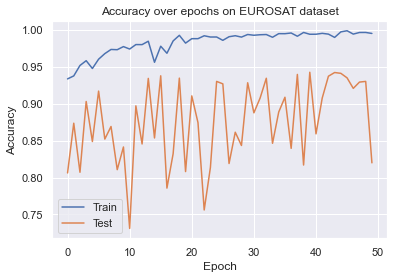

In [17]:
sns.lineplot(x=hist.epoch, y=hist.history['accuracy'])
sns.lineplot(x=hist.epoch, y=hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.title('Accuracy over epochs on EUROSAT dataset')
plt.savefig('resnet50_accuracy.png')